In [2]:
import random

import pandas

from curve_fits import Call, Spec

from curve_fits import curves
from curve_fits import frames

In [3]:
def random_ints_array(size, max_abs=100):
    return random.choices(range(-max_abs, max_abs), k=size)

In [4]:
size_range = range(1500, 2500)
init_calls = [Call(random_ints_array(size)) for size in size_range]
profile = frames.TimeComplexityProfile('list', init_calls, {'pop': Call(), 'copy': Call(), 'sort': Call()},
    index=pandas.Index(size_range, name='List length'), loops=100, overfit=-6, fraction=0.9)

In [6]:
profile.fit_all_with(Call(Spec(curves.Polynomial, 2)), Call(Spec(curves.Xlog, 1)))

In [9]:
profile.best_fits(limit=None)

kind                                                fit DOF
key  cost                                                                    
pop  0.000027  Poly(1)  (-0.004874178170403532) + (1.8269123918875674e...   2
     0.000154     Xlog                    (2.080393271508158e-06)s*log(s)   1
copy 0.000015  Poly(1)  (-0.004941639560995963) + (1.999858229495539e-...   2
     0.000047     Xlog                    (2.304119754781675e-06)s*log(s)   1
sort 0.000796     Xlog                    (2.120481213189791e-05)s*log(s)   1
     0.001001  Poly(1)  (-0.03275631840265666) + (0.0001779266912370883)s   2

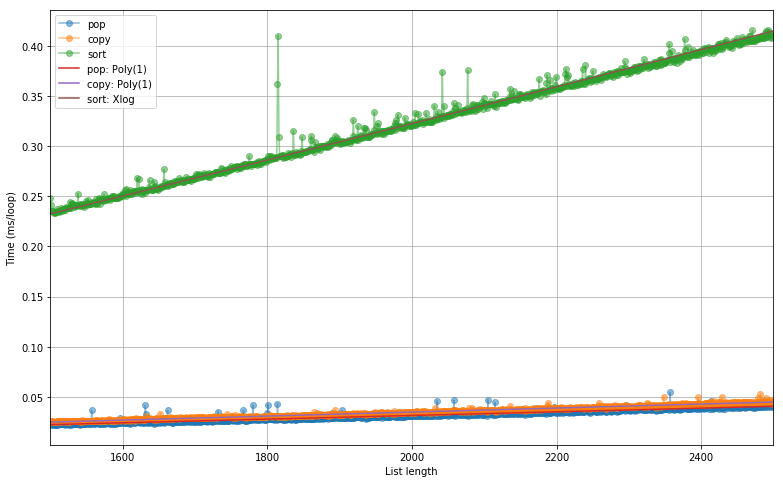

In [10]:
fig, ax = profile.plot(limit=1)

In [11]:
[fit.measures for fit in profile.best_fits(1).fit]

[(<Measure: -0.00487 ± 0.00041>, <Measure: 0.00001827 ± 2.0E-7>),
 (<Measure: -0.00494 ± 0.00022>, <Measure: 0.00002000 ± 1.1E-7>),
 (<Measure: 0.000021205 ± 1.3E-8>,)]

In [13]:
profile.best_fit('sort'), profile.best_fit('pop')

(<CurveFit: (2.120481213189791e-05)s*log(s)>,
 <CurveFit: (-0.004874178170403532) + (1.8269123918875674e-05)s>)